In [2]:
import pandas as pd
import numpy as np
from scipy.stats import expon
from math import factorial
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
def round_to(x, rounding_val):
    return np.round(x / rounding_val) * rounding_val

In [4]:
mpl.rcParams["figure.figsize"] = (15,8)
plt.style.use("bmh")

In [5]:
@np.vectorize
def fisher(lambda_, n=1):
    return n/lambda_

@np.vectorize
def delta_2_fisher(lambda_, max_k = 20, n=1):
    return n * np.sum([
        np.exp(-lambda_) * 
        lambda_ ** (2 * k)
        / factorial(2 * k)
        * (1 + lambda_ / (2 * k + 1))
        * (2*k/lambda_**2 + 1/(2 * k + lambda_ + 1)**2)
    for k in range(max_k + 1)])


In [6]:
@np.vectorize
def delta_3_fisher(lambda_, max_k = 20, n=1):
    return n * np.sum([
        np.exp(-lambda_) * 
        lambda_ ** (3 * k)
        / factorial(3 * k)
        * (1 + lambda_ / (3 * k + 1) + lambda_**2 / (3 * k + 2))
        * (
            3 *k/lambda_ ** 2 
            - (
                6 * k * (lambda_ - 1) 
                + 2 * lambda_ * (lambda_ + 2) 
                - 9 * k**2
            ) / (
                9 * k**2 + lambda_**2 + 2 * lambda_ + 2
                + 3 * k * (lambda_ + 3)
            )**2
        )
    for k in range(max_k + 1)])

In [7]:
lambdas = np.linspace(0.1, 20, num=500)

In [8]:
fishers = fisher(lambdas)
binned_2_fishers = delta_2_fisher(lambdas)
binned_3_fishers = delta_3_fisher(lambdas)

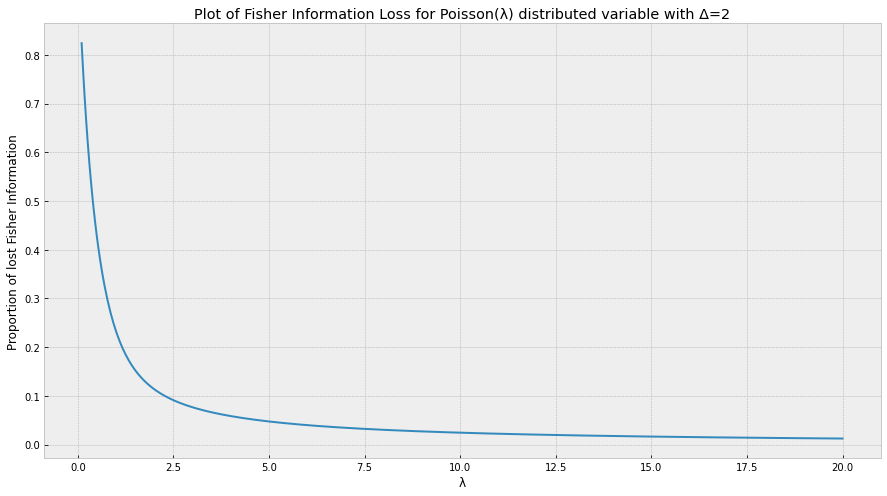

In [9]:
plt.plot(lambdas, 1 - binned_2_fishers/fishers)
plt.title('Plot of Fisher Information Loss for Poisson(λ) distributed variable with Δ=2')
plt.xlabel('λ')
plt.ylabel('Proportion of lost Fisher Information')
# plt.savefig("./thesis/poisson_info_loss.pdf")